In [17]:
import os

# Check if the file exists and remove it
if os.path.isfile('MS_dcf3.csv'):
    os.remove('MS_dcf3.csv')

# Now upload your file
from google.colab import files
uploaded = files.upload()


Saving MS_dcf3.csv to MS_dcf3.csv


In [18]:
import pandas as pd

df = pd.read_csv('MS_dcf3.csv') # replace 'your_file_name.csv' with the actual file name
print(df)


   Term  Inv  Rev_mean  Rev_StdDev  C1_mean  C1_StdDev  C2_mean  C2_StdDev  \
0     0  -70         0           0        0          0        0          0   
1     1    0       120          50       40          5       30          5   
2     2    0       105          50       42          5       31          5   
3     3    0       110          60       44          5       32          5   

   C3_mean  C3_StdDev  R_mean  R_StdDev  Rev_AutoCorr  C1_AutoCorr  \
0        0          0    0.06         0             0            0   
1       10          1    0.06         0             0            0   
2       12          1    0.06         0             0            0   
3       13          1    0.06         0             0            0   

   C2_AutoCorr  C3_AutoCorr   
0            0             0  
1            0             0  
2            0             0  
3            0             0  


In [19]:
import io

df = pd.read_csv(io.BytesIO(uploaded['MS_dcf3.csv']))


In [20]:
df = pd.read_csv('MS_dcf3.csv')
df.columns = df.columns.str.strip()


Expected NPV : 3.27842272173729
Probability of Negative NPV : 47.980000000000004%


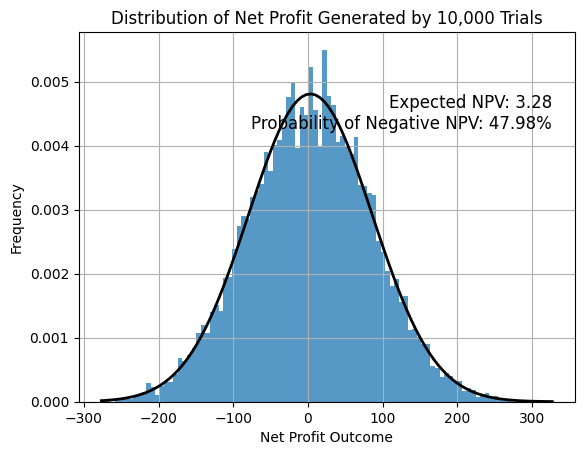

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load your data
df = pd.read_csv('MS_dcf3.csv')

# Strip leading/trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Set the number of simulations
num_simulations = 10000

# Initialize an empty array to hold the NPV for each simulation
npv_array = np.zeros(num_simulations)

# Loop over each simulation
for i in range(num_simulations):
    cashflows = np.zeros(df.shape[0])
    for index, row in df.iterrows():
        # Generate revenues and costs for this stage, taking into account autocorrelation
        rev = np.random.normal(row['Rev_mean'], row['Rev_StdDev'])
        c1 = np.random.normal(row['C1_mean'], row['C1_StdDev'])
        c2 = np.random.normal(row['C2_mean'], row['C2_StdDev'])
        c3 = np.random.normal(row['C3_mean'], row['C3_StdDev'])

        # Compute the net cash flow for this stage
        net_cashflow = rev - c1 - c2 - c3

        # Apply the discount rate
        discount_rate = row['R_mean']
        discounted_cashflow = net_cashflow / (1 + discount_rate) ** index

        cashflows[index] = discounted_cashflow

    # Calculate the NPV for this simulation
    npv = cashflows.sum() + df['Inv'].iloc[0]
    npv_array[i] = npv

# Compute the expected NPV
expected_NPV = np.mean(npv_array)

# Compute the standard deviation of the NPV
std_NPV = np.std(npv_array)

# Compute the probability of a negative NPV
prob_of_negative_NPV = np.mean(npv_array < 0)

print(f"Expected NPV : {expected_NPV}")
print(f"Probability of Negative NPV : {prob_of_negative_NPV * 100}%")

# Plot the distribution of NPVs
plt.hist(npv_array, bins=100, alpha=0.75, density=True)
plt.xlabel('Net Profit Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Net Profit Generated by 10,000 Trials')
plt.grid(True)

# Generate x values
x = np.linspace(min(npv_array), max(npv_array), 100)

# Generate normal distribution with same mean and standard deviation as your data
p = norm.pdf(x, np.mean(npv_array), np.std(npv_array))

# Plot normal distribution
plt.plot(x, p, 'k', linewidth=2)

# Add text to the upper right corner of the plot
plt.text(np.max(npv_array), np.max(p), 
         f'Expected NPV: {expected_NPV:.2f}\nProbability of Negative NPV: {prob_of_negative_NPV * 100:.2f}%', 
         verticalalignment='top', horizontalalignment='right', fontsize=12)

plt.show()
